In [ ]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
consumer_key = 'LrSxpWHRWjwa2h8R4SQOZJUIV'
consumer_secret_key = '8d3xWVMKm6LpXDIbZW930I5eiH0kb0jhtNr8pvSHkABm63qPh9'
access_token = '1334421915549585408-8HocCnFw9QvWCZLXbei8QL5BrwfFi4'
access_token_secret = 'DePvAq20EWinXLyCi82cfPYIedfAamMMRXet5L40e8XWO'

In [ ]:
auth = tweepy.OAuthHandler(consumer_key,consumer_secret_key)
auth.set_access_token(access_token,access_token_secret)
api = tweepy.API(auth)

In [73]:
posts = api.user_timeline(screen_name="JoeBiden", count=1000, lang="en", tweet_mode="extended")

# Print the last 10 tweets
print("Show the 10 recent tweets:\n")
i=1
for tweet in posts[:10]:
  print(str(i) +') '+ tweet.full_text + '\n')
  i= i+1

Show the 10 recent tweets:

1) With @ossoff and @ReverendWarnock in the Senate, the doors of promise and progress will open in Washington. 
 
https://t.co/RIJ1L4B5o9 https://t.co/Dus1Mft7qD

2) From the economy to criminal justice to climate change — there’s so much we can get done. But we need senators who are willing to do it.
 
https://t.co/RIJ1L4juwB https://t.co/Bplr5wYLHd

3) Mayor @PeteButtigieg is a leader, patriot, and problem-solver. He speaks to the best of who we are as a nation.

I am nominating him for Secretary of Transportation because he's equipped to take on the challenges at the intersection of jobs, infrastructure, equity, and climate.

4) The future of health care, the economy, and the planet are all on the line. We’ve got to win Georgia and flip the Senate.

https://t.co/RIJ1L4juwB https://t.co/euGgJtxMBY

5) With early voting underway and just three weeks until Election Day, I’m in Atlanta to encourage folks to get out and vote. Tune in. https://t.co/qpYvQGrBhE



In [74]:
df = pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])
#Show the first 10 rows of data
df.head()

,Tweets
0,With @ossoff and @ReverendWarnock in the Senat...
1,From the economy to criminal justice to climat...
2,"Mayor @PeteButtigieg is a leader, patriot, and..."
3,"The future of health care, the economy, and th..."
4,With early voting underway and just three week...


In [75]:
# Create a function to clean the tweets
def cleanTxt(text):
 text = re.sub('@[A-Za-z0–9]+', '', text) #Removing @mentions
 text = re.sub('#', '', text) # Removing '#' hash tag
 text = re.sub('RT[\s]+', '', text) # Removing RT
 text = re.sub('https?:\/\/\S+', '', text) # Removing hyperlink
 
 return text


# Clean the tweets
df['Tweets'] = df['Tweets'].apply(cleanTxt)

# Show the cleaned tweets
df

,Tweets
0,"With and in the Senate, the doors of promise..."
1,From the economy to criminal justice to climat...
2,"Mayor is a leader, patriot, and problem-solve..."
3,"The future of health care, the economy, and th..."
4,With early voting underway and just three week...
...,...
195,"Today, I have named a COVID-19 Transition Advi..."
196,I spent the morning with the co-chairs of my C...
197,46: Statement by President-elect Biden on Pfiz...
198,46: We stand together as one America. We will ...


In [76]:
# Create a function to get the subjectivity
def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
   return  TextBlob(text).sentiment.polarity


# Create two new columns 'Subjectivity' & 'Polarity'
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

# Show the new dataframe with columns 'Subjectivity' & 'Polarity'
df

,Tweets,Subjectivity,Polarity
0,"With and in the Senate, the doors of promise...",0.500000,0.000000
1,From the economy to criminal justice to climat...,0.500000,0.016667
2,"Mayor is a leader, patriot, and problem-solve...",0.300000,1.000000
3,"The future of health care, the economy, and th...",0.262500,0.400000
4,With early voting underway and just three week...,0.300000,0.100000
...,...,...,...
195,"Today, I have named a COVID-19 Transition Advi...",0.066667,0.000000
196,I spent the morning with the co-chairs of my C...,0.100000,-0.100000
197,46: Statement by President-elect Biden on Pfiz...,0.000000,0.000000
198,46: We stand together as one America. We will ...,0.000000,0.000000


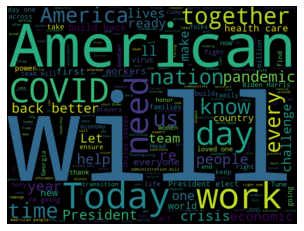

In [77]:
# word cloud visualization
allWords = ' '.join([twts for twts in df['Tweets']])
wordCloud = WordCloud(width=800, height=600, random_state=18, max_font_size=700).generate(allWords)


plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
pip install WordCloud

In [78]:
# Create a function to compute negative (-1), neutral (0) and positive (+1) analysis
def getAnalysis(score):
 if score < 0:
  return 'Negative'
 elif score == 0:
  return 'Neutral'
 else:
  return 'Positive'
df['Analysis'] = df['Polarity'].apply(getAnalysis)
# Show the dataframe
df

,Tweets,Subjectivity,Polarity,Analysis
0,"With and in the Senate, the doors of promise...",0.500000,0.000000,Neutral
1,From the economy to criminal justice to climat...,0.500000,0.016667,Positive
2,"Mayor is a leader, patriot, and problem-solve...",0.300000,1.000000,Positive
3,"The future of health care, the economy, and th...",0.262500,0.400000,Positive
4,With early voting underway and just three week...,0.300000,0.100000,Positive
...,...,...,...,...
195,"Today, I have named a COVID-19 Transition Advi...",0.066667,0.000000,Neutral
196,I spent the morning with the co-chairs of my C...,0.100000,-0.100000,Negative
197,46: Statement by President-elect Biden on Pfiz...,0.000000,0.000000,Neutral
198,46: We stand together as one America. We will ...,0.000000,0.000000,Neutral


In [79]:
# Printing positive tweets 
print('Printing positive tweets:\n')
j=1
sortedDF = df.sort_values(by=['Polarity']) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
  if( sortedDF['Analysis'][i] == 'Positive'):
    print(str(j) + ') '+ sortedDF['Tweets'][i])
    print()
    j= j+1

Printing positive tweets:

1) From the economy to criminal justice to climate change — there’s so much we can get done. But we need senators who are willing to do it.
 
 

2) Mayor  is a leader, patriot, and problem-solver. He speaks to the best of who we are as a nation.

I am nominating him for Secretary of Transportation because he's equipped to take on the challenges at the intersection of jobs, infrastructure, equity, and climate.

3) The future of health care, the economy, and the planet are all on the line. We’ve got to win Georgia and flip the Senate.

 

4) With early voting underway and just three weeks until Election Day, I’m in Atlanta to encourage folks to get out and vote. Tune in. 

5) Health care is personal to me — and I’ll always fight to ensure folks like Xiomara are protected and have access to the care they need.

Don’t miss your chance to get covered for 2021, head to  before midnight to pick a plan that works best for you. 

6) Today, the members of the Electoral

In [80]:
# Printing negative tweets  
print('Printing negative tweets:\n')
j=1
sortedDF = df.sort_values(by=['Polarity'],ascending=False) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
  if( sortedDF['Analysis'][i] == 'Negative'):
    print(str(j) + ') '+sortedDF['Tweets'][i])
    print()
    j=j+1

Printing negative tweets:

1) As I said throughout the campaign: I will be a president for all Americans.

I will work just as hard for those of you who didn’t vote for me as I will for those who did.

2) In America, politicians don’t take power — the people grant it to them. 

The flame of democracy was lit in this nation a long time ago.

And we now know that nothing — not even a pandemic or an abuse of power — can extinguish that flame.

3) We may be physically apart during these difficult times, but you’re not alone. Take a few minutes today to reach out to friends and family. We’ll get through this, together. 

4) There are just a few days left of Obamacare's open enrollment for 2021 coverage. Don't wait — visit  today to find an affordable, quality plan that works for you.

5) We must prepare to meet the challenges of the future — not keep fighting the wars of the past. 

6) I know times are tough, the challenges are daunting, but I know we can do this.

We can create an economic

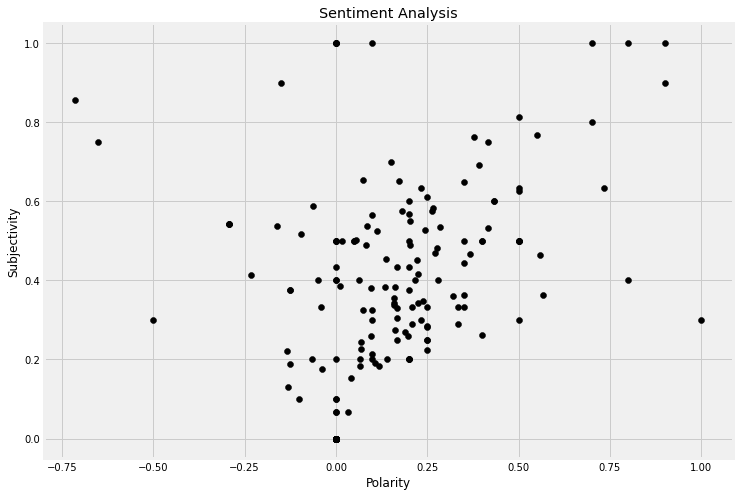

In [81]:
# Plotting 
plt.figure(figsize=(11,8)) 
for i in range(0, df.shape[0]):
  plt.scatter(df["Polarity"][i], df["Subjectivity"][i], color='black') 
# plt.scatter(x,y,color)   
plt.title('Sentiment Analysis') 
plt.xlabel('Polarity') 
plt.ylabel('Subjectivity') 
plt.show()

In [82]:
# Print the percentage of positive tweets
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['Tweets']
ptweets

round( (ptweets.shape[0] / df.shape[0]) * 1000 , 1)

570.0

In [83]:
# Print the percentage of negative tweets
ntweets = df[df.Analysis == 'Negative']
ntweets = ntweets['Tweets']
ntweets

round( (ntweets.shape[0] / df.shape[0]) * 1000, 1)

105.0

In [84]:
# Show the value counts
df['Analysis'].value_counts()

Positive    114
Neutral      65
Negative     21
Name: Analysis, dtype: int64

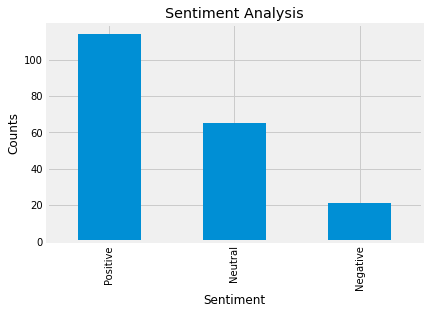

In [85]:
# Plotting and visualizing the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind = 'bar')
plt.show()

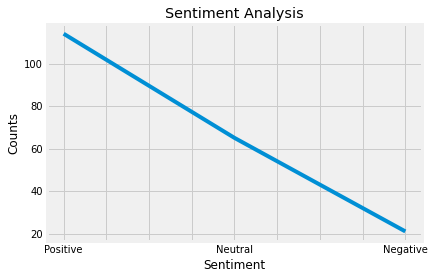

In [86]:
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind = 'line')
plt.show()